In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from google.colab import files
uploaded=files.upload()

Saving time_series_ass3 to time_series_ass3


In [19]:
data=pd.read_csv('time_series_ass3')

In [7]:
data.head()

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        6959 non-null   float64
 4   PM2.5 (µg/m3)       8414 non-null   float64
 5   NO (µg/m3)          7271 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 405.1+ KB


In [20]:
data=data.drop(columns='Unnamed: 0')

<Axes: >

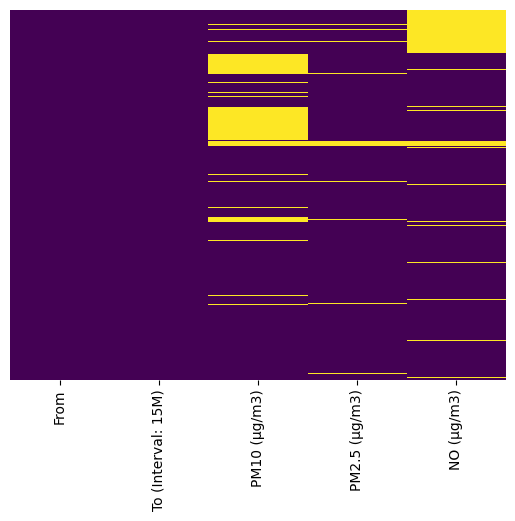

In [31]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
data['To (Interval: 15M)'] = pd.to_datetime(data.pop('To (Interval: 15M)'), format='%Y.%m.%d %H:%M:%S')

In [22]:
data['From']=pd.to_datetime(data.pop('From'), format='%Y.%m.%d %H:%M:%S')

In [34]:
data.head()

,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),To (Interval: 15M),From
0,95.0,35.0,NaN,2023-02-01 00:15:00,2023-02-01 00:00:00
1,95.0,35.0,NaN,2023-02-01 00:30:00,2023-02-01 00:15:00
2,95.0,35.0,NaN,2023-02-01 00:45:00,2023-02-01 00:30:00
3,122.0,34.0,NaN,2023-02-01 01:00:00,2023-02-01 00:45:00
4,122.0,34.0,NaN,2023-02-01 01:15:00,2023-02-01 01:00:00


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

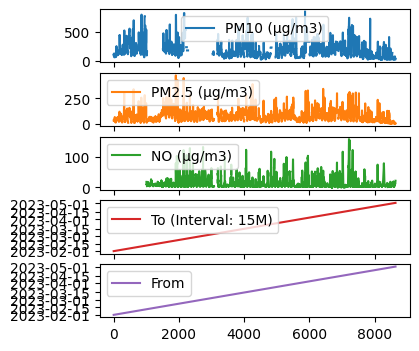

In [35]:
data.plot(subplots=True, figsize=(4, 4))

In [23]:
col=['PM10 (µg/m3)','PM2.5 (µg/m3)','NO (µg/m3)']
data[col]=data[col].interpolate(method='linear',limit_direction='both')

In [24]:
from sklearn.ensemble import IsolationForest
def remove_out(data, contamination=0.05):
  isolation_forest = IsolationForest(n_estimators=100, contamination=0.1)
  outliers= isolation_forest.fit_predict(data)
  return data[outliers != -1]


In [25]:

data[col]=remove_out(data[col])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [26]:
from statsmodels.tsa.arima.model import ARIMA
data['To (Interval: 15M)'] = data['To (Interval: 15M)'].map(pd.Timestamp.timestamp)
data['From'] = data['From'].map(pd.Timestamp.timestamp)

order = (2,1,1)
model = ARIMA(data, order=order)
model_fit = model.fit()

print(model_fit.summary())

ValueError: ignored